In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Resume Dataset

In [325]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [326]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [327]:
df.shape

(962, 2)

## Exploring Categories

In [328]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

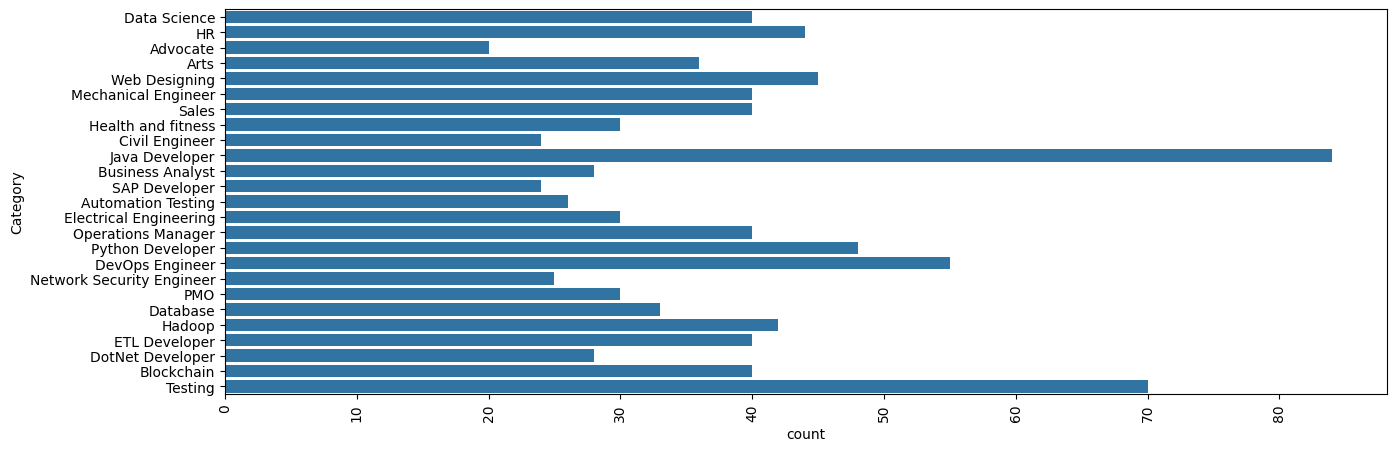

In [329]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [330]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

## Exploring Resume

In [331]:
df['Category'][0]

'Data Science'

In [332]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning Data

In [333]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [334]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [335]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

## Assigning Labels to Categories

In [336]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [337]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [338]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

## Vectorization

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

## Splitting

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

In [342]:
X_train.shape

(769, 7351)

In [343]:
X_test.shape

(193, 7351)

## Training the Model

In [344]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


In [345]:
ypred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

## Predicting Category

In [346]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [349]:
myresume = df['Resume'][961]

In [350]:
import pickle

clf = pickle.load(open('clf.pkl', 'rb'))

tfidf = pickle.load(open('tfidf.pkl', 'rb'))

cleaned_resume = cleanResume(myresume)

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_names = le.inverse_transform(clf.classes_)

category_mapping = {idx: category_name for idx, category_name in enumerate(category_names)}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Testing
23


## Skills Dataset

In [313]:
dfs = pd.read_csv('skills.csv')
dfs.head()

,Skill
0,Java
1,Python
2,HTML
3,CSS
4,JavaScript


## Extracting Skills from Resume

In [314]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def extract_skills(myresume, skills_list):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(myresume.lower())
    filtered_tokens = [word for word in word_tokens if word not in stop_words and word.isalnum()]
    
    skills_list_lower = set([skill.lower() for skill in skills_list])
    
    skills = set([word for word in filtered_tokens if word.lower() in skills_list_lower])
    
    return skills

skills_list = dfs['Skill']

skills = extract_skills(myresume, skills_list)
print("Extracted Skills:", skills)


Extracted Skills: {'java', 'bootstrap', 'sql', 'python', 'kafka', 'javascript', 'mysql', 'nltk', 'cassandra', 'docker', 'html', 'jquery', 'git', 'css', 'flask', 'angular', 'elasticsearch'}


## Job Description Dataset

In [315]:
df = pd.read_csv('job_title_des.csv')
df.head()

,Unnamed: 0,Job Title,Job Description
0,0,Flutter Developer,We are looking for hire experts flutter develo...
1,1,Django Developer,PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...
2,2,Machine Learning,"Data Scientist (Contractor)\n\nBangalore, IN\n..."
3,3,iOS Developer,JOB DESCRIPTION:\n\nStrong framework outside o...
4,4,Full Stack Developer,job responsibility full stack engineer – react...


In [316]:
df['Job Description'][1]

'PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ - 04)\nStrong Python experience in API development (REST/RPC).\nExperience working with API Frameworks (Django/flask).\nExperience evaluating and improving the efficiency of programs in a Linux environment.\nAbility to effectively handle multiple tasks with a high level of accuracy and attention to detail.\nGood verbal and written communication skills.\nWorking knowledge of SQL.\nJSON experience preferred.\nGood knowledge in automated unit testing using PyUnit.'

## Cleaning Job Description

In [317]:
df['Job Description'] = df['Job Description'].apply(lambda x: cleanResume(x))

In [318]:
JD = df['Job Description'][1]
print(JD)

PYTHON DJANGO Developer Lead Job Code PDJ 04 Strong Python experience in API development REST RPC Experience working with API Frameworks Django flask Experience evaluating and improving the efficiency of programs in a Linux environment Ability to effectively handle multiple tasks with a high level of a uracy and attention to detail Good verbal and written communication skills Working knowledge of SQL JSON experience preferred Good knowledge in automated unit testing using PyUnit 


## Extracting Skills from Job Description

In [319]:
skills_list = dfs['Skill']

JD_skills = extract_skills(JD, skills_list)
print("Extracted Job Skills:", JD_skills)

Extracted Job Skills: {'sql', 'python', 'django', 'json', 'flask'}


## Comparing Skills from Resume and Job Description

In [320]:
def compute_jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard_similarity = intersection / union
    return jaccard_similarity

def compute_similarity_percentage(jaccard_similarity):
    similarity_percentage = jaccard_similarity * 100
    return similarity_percentage

jaccard_similarity = compute_jaccard_similarity(skills, JD_skills)

similarity_percentage = compute_similarity_percentage(jaccard_similarity)

print("Jaccard Similarity:", jaccard_similarity)
print("Similarity Percentage:", similarity_percentage)


Jaccard Similarity: 0.15789473684210525
Similarity Percentage: 15.789473684210526
